In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data

df = pd.read_csv('Data/Data.csv')

In [3]:
# Data

print("Data :-------------------------------------------------------- ")

print("\nShape : ")
print(df.shape)
    
print("\nColumns : ")
print(df.columns)
    
print("\nInfo : ")
print(df.info())
    
print("\nNull values / column : ")
print(df.isnull().sum())
    
print("\n% Null values / column : ")
print(df.isnull().sum() / len(df))
    
print("\nNumber of news : (0 -> Reliable News, 1 -> Unreliable News)")
print(df['label'].value_counts())

Data :-------------------------------------------------------- 

Shape : 
(20800, 5)

Columns : 
Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None

Null values / column : 
id           0
title      558
author    1957
text        39
label        0
dtype: int64

% Null values / column : 
id        0.000000
title     0.026827
author    0.094087
text      0.001875
label     0.000000
dtype: float64

Number of news : (0 -> Reliable News, 1 -> Unreliable News)
1    10413
0    10387
Name: label, dtype: int64


Here, we can see that the % missing value of 'text' column in data is very low, so we can remove the entire row having no text.

In [4]:
# Removing rows with no text data

df = df.dropna(subset=['text'])

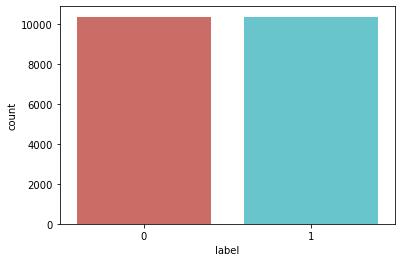

In [5]:
# Class distribution (reliable vs. unreliable)
# 0 -> Reliable News
# 1 -> Unreliable News

sns.countplot(x='label', data=df, palette='hls')

Classes are fairly distributed.

In [6]:
# Filling null values with ' '

df = df.fillna(' ')

In [7]:
# Missing Values in Data

print("Missing values in data : ")
print(df.isnull().sum())

Missing values in data : 
id        0
title     0
author    0
text      0
label     0
dtype: int64


In [8]:
# Combining 'title', 'author', 'text' columns

df['total_info'] = df.title + ' ' + df.author + ' ' + df.text

In [9]:
df['total_info'].head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: total_info, dtype: object

## Converting data to lowercase

In [10]:
df['total_info'] = df['total_info'].apply(lambda sentence: ' '.join(word.lower() for word in sentence.split()))

In [11]:
df['total_info'].head()

0    house dem aide: we didn’t even see comey’s let...
1    flynn: hillary clinton, big woman on campus - ...
2    why the truth might get you fired consortiumne...
3    15 civilians killed in single us airstrike hav...
4    iranian woman jailed for fictional unpublished...
Name: total_info, dtype: object

## Removing punctuations

In [12]:
df['total_info'] = df['total_info'].str.replace('[^\w\s]','')

In [13]:
df['total_info'].head()

0    house dem aide we didnt even see comeys letter...
1    flynn hillary clinton big woman on campus  bre...
2    why the truth might get you fired consortiumne...
3    15 civilians killed in single us airstrike hav...
4    iranian woman jailed for fictional unpublished...
Name: total_info, dtype: object

## Removing stop words

In [14]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print("Stop Words : \n", stop_words)

Stop Words : 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

In [15]:
df['total_info'] = df['total_info'].apply(lambda sentence: ' '.join(word for word in sentence.split() if word not in stop_words))

In [16]:
df['total_info'][0]

'house dem aide didnt even see comeys letter jason chaffetz tweeted darrell lucus house dem aide didnt even see comeys letter jason chaffetz tweeted darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license apologies keith olbermann doubt worst person world weekfbi director james comey according house democratic aide looks like also know secondworst person well turns comey sent nowinfamous letter announcing fbi looking emails may related hillary clintons email server ranking democrats relevant committees didnt hear comey found via tweet one republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existen

## Removing unnecessary columns

In [17]:
df.columns

Index(['id', 'title', 'author', 'text', 'label', 'total_info'], dtype='object')

In [18]:
df.head(10)

,id,title,author,text,label,total_info
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired consortiumnewscom truth ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed single us airstrike identi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished sto...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,jackie mason hollywood would love trump bombed...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life luxury elton johns 6 favorite shark ...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,benoît hamon wins french socialist partys pres...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpts draft script donald trumps qampa blac...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,backchannel plan ukraine russia courtesy trump...


Here, We don't require 'id', 'title', 'author' & 'text' columns anymore.

In [19]:
df = df.drop(['id', 'title', 'author', 'text'], axis = 1)

In [20]:
df.head(10)

,label,total_info
0,1,house dem aide didnt even see comeys letter ja...
1,0,flynn hillary clinton big woman campus breitba...
2,1,truth might get fired consortiumnewscom truth ...
3,1,15 civilians killed single us airstrike identi...
4,1,iranian woman jailed fictional unpublished sto...
5,0,jackie mason hollywood would love trump bombed...
6,1,life life luxury elton johns 6 favorite shark ...
7,0,benoît hamon wins french socialist partys pres...
8,0,excerpts draft script donald trumps qampa blac...
9,0,backchannel plan ukraine russia courtesy trump...


&nbsp;

## Data preparation for model building

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20)

In [22]:
print('Train Shape : ', train.shape)
print('\nTest Shape  : ', test.shape)

Train Shape :  (16608, 2)

Test Shape  :  (4153, 2)


In [23]:
# Defining variables for num_words, maxlen

MAX_SEQUENCE_LENGTH = 500
MAX_WORDS = 35000

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(train.total_info)

train_sequences = tokenizer.texts_to_sequences(train.total_info)
test_sequences = tokenizer.texts_to_sequences(test.total_info)

In [25]:
# Dictionary containing words and their index

word_index = tokenizer.word_index
#print(word_index)

# Total unique words in corpus
print('Unique Tokens : ', len(word_index))

Unique Tokens :  193145


In [26]:
# Getting only the top frequent words on train & test

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

print('Train Data Shape : ', train_data.shape)
print('\nTest Data Shape  : ', test_data.shape)

Train Data Shape :  (16608, 500)

Test Data Shape  :  (4153, 500)


In [27]:
train_labels = train['label']
test_labels = test['label']

In [28]:
# Changing Data Types

from tensorflow.keras.utils import to_categorical

labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))

print('Train Label Tensor : ', labels_train.shape)
print('Test Label Tensor  : ', labels_test.shape)

Train Label Tensor :  (16608, 2)
Test Label Tensor  :  (4153, 2)


## Saving data

In [29]:
# Saving df, train_data, test_data, labels_train, labels_test 

import pickle

pickle.dump(df, open('pklFiles/df.pkl', 'wb'))
pickle.dump(train_data, open('pklFiles/train_data.pkl', 'wb'))
pickle.dump(test_data, open('pklFiles/test_data.pkl', 'wb'))
pickle.dump(labels_train, open('pklFiles/labels_train.pkl', 'wb'))
pickle.dump(labels_test, open('pklFiles/labels_test.pkl', 'wb'))